# Import Required Libraries and Dataset

In [37]:
import numpy as np # NumPy is a Python library used for working with arrays.
                   #It also has functions for working in domain of linear algebra, fourier tranform, and matrices.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle

In [38]:
df = pd.read_csv("forestfires.csv")

# Data Description

In [39]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [40]:
# Aim:- We have to predict the burned areas in hectre.

In [41]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [43]:
# Checking for null values
df.isnull().any()

X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

C:\Users\ADI\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='area', ylabel='Density'>

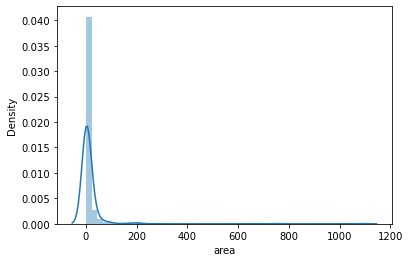

In [44]:
sns.distplot(df["area"])

C:\Users\ADI\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='area', ylabel='Density'>

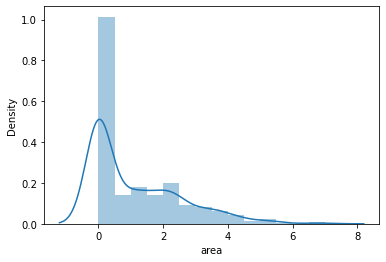

In [45]:
df['area'] = np.log(df['area']+1) # The numpy.log() is a mathematical function that helps user to calculate Natural logarithm of x where x belongs to all the input array elements.
sns.distplot(df['area'])

In [46]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [47]:
df['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [48]:
df['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

# Visualizing Dataset

C:\Users\ADI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Countplot for days in week'),
 Text(0.5, 0, 'days'),
 Text(0, 0.5, 'count')]

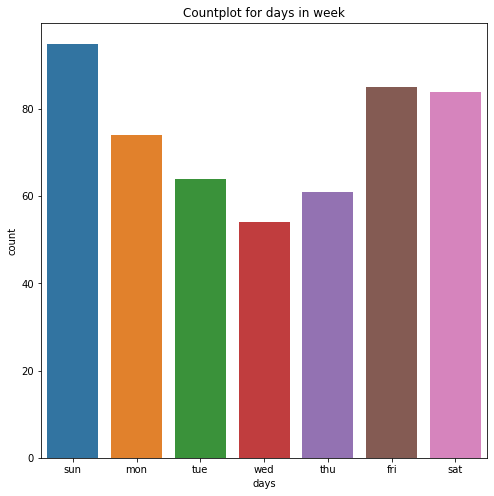

In [49]:
plt.rcParams['figure.figsize'] = [8,8]
day = sns.countplot(df['day'],order=['sun','mon','tue','wed','thu','fri','sat'])
day.set(title = 'Countplot for days in week', xlabel = 'days', ylabel = 'count')

In [50]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [51]:
df['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [52]:
df['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

C:\Users\ADI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Countplot for months in year'),
 Text(0.5, 0, 'months'),
 Text(0, 0.5, 'count')]

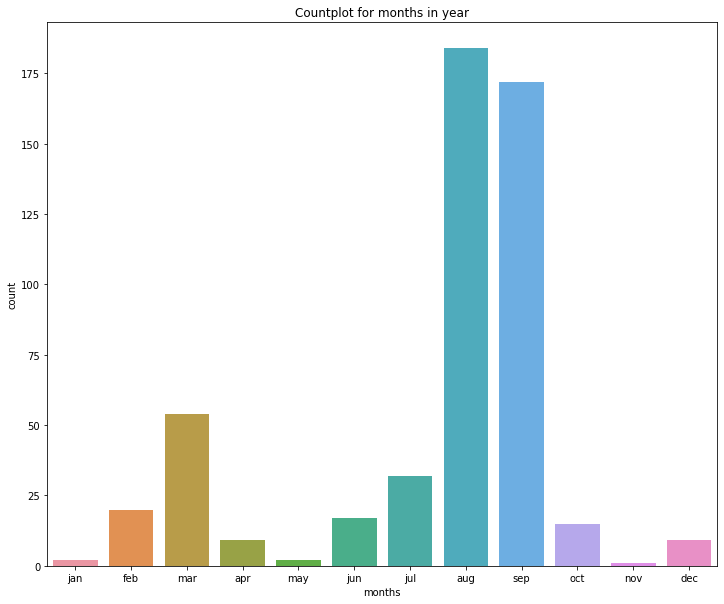

In [53]:
plt.rcParams['figure.figsize'] = [12,10]
day = sns.countplot(df['month'],order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
day.set(title = 'Countplot for months in year', xlabel = 'months', ylabel = 'count')

<AxesSubplot:>

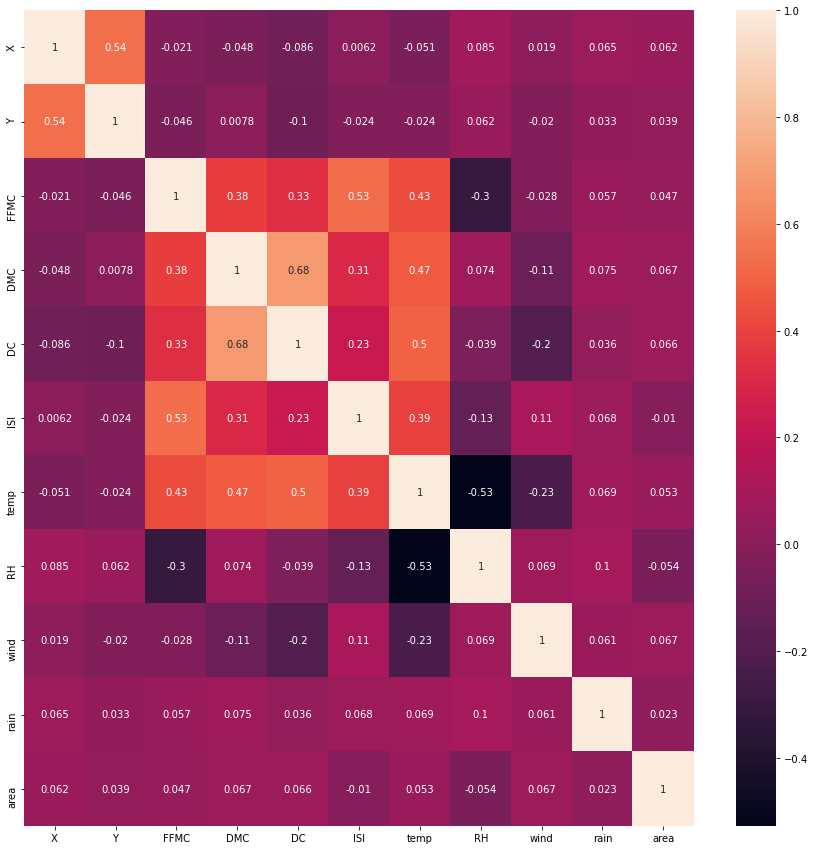

In [54]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [55]:
# Now to further deal with data we need to convert the datatype of month and day from object-type to float.
# So we reform the dataset now,
df['month'].replace({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12},inplace=True)
df['day'].replace({'sun':1,'mon':2,'tue':3,'wed':4,'thu':5,'fri':6,'sat':7},inplace=True)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


# Test-Train Split

In [57]:
y = df['area']         #  y is the target value.
x = df.drop(columns='area')  # x is the rest of the dataset except features.

In [58]:
x

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,8,1,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,8,1,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [59]:
y

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
512    2.006871
513    4.012592
514    2.498152
515    0.000000
516    0.000000
Name: area, Length: 517, dtype: float64

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state = 50)

In [62]:
x_train

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
124,3,4,9,6,94.3,85.1,692.3,15.9,19.8,50,5.4,0.0
319,5,4,9,5,92.8,119.0,783.5,7.5,21.6,28,6.3,0.0
20,6,4,9,3,91.0,129.5,692.6,7.0,18.3,40,2.7,0.0
99,3,4,8,1,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0
210,4,4,10,7,90.6,43.7,686.9,6.7,18.4,25,3.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
70,4,5,3,6,91.2,48.3,97.8,12.5,15.8,27,7.6,0.0
132,4,6,3,1,89.3,51.3,102.2,9.6,10.6,46,4.9,0.0
289,7,4,7,7,91.6,104.2,474.9,9.0,24.3,30,1.8,0.0
109,4,5,9,2,88.6,91.8,709.9,7.1,17.4,56,5.4,0.0


In [63]:
x_test

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
463,6,5,2,3,75.1,4.4,16.2,1.9,4.6,82,6.3,0.0
418,2,4,8,1,92.0,203.2,664.5,8.1,24.9,42,5.4,0.0
391,8,6,9,6,91.1,91.3,738.1,7.2,20.7,46,2.7,0.0
370,7,4,9,1,91.0,276.3,825.1,7.1,13.8,77,7.6,0.0
166,6,5,8,4,92.1,111.2,654.1,9.6,16.6,47,0.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
489,4,4,8,4,95.1,141.3,605.8,17.7,20.6,58,1.3,0.0
162,6,3,3,7,90.6,50.1,100.4,7.8,15.2,31,8.5,0.0
81,1,2,8,1,90.2,99.6,631.2,6.3,17.9,44,2.2,0.0
507,2,4,8,6,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0


In [64]:
y_train

124    0.000000
319    1.688249
20     0.000000
99     0.000000
210    3.228034
         ...   
70     0.000000
132    0.000000
289    0.000000
109    0.000000
480    1.321756
Name: area, Length: 387, dtype: float64

In [65]:
y_test

463    1.854734
418    1.235471
391    3.439777
370    2.489894
166    1.190888
         ...   
489    0.000000
162    1.078410
81     0.000000
507    0.000000
225    3.902982
Name: area, Length: 130, dtype: float64

# MODELS

## Linear Regression

In [67]:
lr = LinearRegression()
model = lr.fit(x_train,y_train)
lr_prediction = model.predict(x_test)
print(lr_prediction)

[0.59167205 1.41509845 1.14010375 1.6054665  0.87569653 1.37778505
 1.52508359 1.10150968 1.39505285 1.43559994 1.89382951 1.03833232
 1.18855067 0.72502819 1.07964791 1.42495655 0.39703206 1.66063786
 1.19392228 1.34948265 0.74541613 1.36996623 0.84679852 1.32528395
 1.91623883 1.04745791 1.24886903 0.39558378 1.18855067 0.55305129
 1.16155916 1.46582415 1.48550074 0.96186248 1.24817402 0.86932741
 0.99043457 0.93885467 0.99247945 1.43179595 0.78400613 1.20864764
 0.88118543 0.86421176 0.58815639 1.25731504 1.28652973 1.37877464
 0.84360647 1.3294607  1.13341391 0.84739251 0.98982012 1.08539963
 0.86263149 0.74998685 0.89812382 1.43685528 1.06802118 1.11449914
 0.96179307 1.00814383 1.03760215 0.70346483 0.84959276 1.04525921
 1.09861117 1.07841162 1.06198364 1.18575193 0.80787391 1.2572001
 1.01410805 1.06226739 1.05514059 1.5621455  1.11664281 0.93464953
 0.90938545 1.16047938 0.79065685 1.37882407 1.04487415 1.07691084
 0.78689537 1.20700517 1.17448406 1.13295564 0.05188834 1.12291

In [69]:
print("Mean Squared Error = ",mse(lr_prediction,y_test))
print("Mean Absolute Error = ",mae(lr_prediction,y_test))
print("R2 Score = ",r2_score(lr_prediction,y_test))

Mean Squared Error =  1.9110524041518842
Mean Absolute Error =  1.130194590586168
R2 Score =  -18.169634071267062


## Random Forest Regression

In [70]:
rfreg = RandomForestRegressor()
model = rfreg.fit(x_train,y_train)
rfreg_prediction = model.predict(x_test)
print(rfreg_prediction)

[1.58330968 1.28137499 1.1963741  0.98045561 0.54515685 0.92995497
 1.62102219 0.56442493 1.22753485 1.19354557 1.76900443 1.5514901
 1.91035903 0.22158653 0.52561683 0.95462695 1.2531029  1.46591578
 1.39144896 2.12479554 0.81929302 0.31572702 0.82376901 1.25114002
 3.3071261  0.99839749 1.48535834 0.84075045 1.91035903 1.31090339
 0.59097044 1.17276918 0.37796912 0.71503024 1.08757848 0.47707323
 0.44436873 1.40534027 1.17994709 0.94656258 0.57295222 0.28440389
 1.74158428 0.74745157 0.8264107  1.86441269 1.38728674 1.6875708
 0.90753272 0.76498909 0.85995453 0.96060917 1.14973613 1.45331337
 0.53318314 1.37290799 0.68066085 0.68817413 1.25926025 0.98411279
 0.94960962 1.06914379 1.16022498 0.44908113 1.01310454 0.15537782
 0.45821433 0.88370954 1.20254858 0.6007387  1.68410652 1.65657805
 1.27453787 1.5322267  1.49987895 0.40268424 1.64971074 0.89726937
 1.84914052 0.64073419 0.39935823 1.842926   1.13567684 0.90451353
 0.76852463 1.49275044 1.10578466 1.68973569 1.74370767 1.793391

In [71]:
print("Mean Squared Error = ",mse(rfreg_prediction,y_test))
print("Mean Absolute Error = ",mae(rfreg_prediction,y_test))
print("R2 Score = ",r2_score(rfreg_prediction,y_test))

Mean Squared Error =  2.0221322556412753
Mean Absolute Error =  1.1470552634136477
R2 Score =  -6.872118799752557


## Decision Tree Regression

In [72]:
dtr = DecisionTreeRegressor()
model = dtr.fit(x_train,y_train)
dtr_prediction = model.predict(x_test)
print(dtr_prediction)

[3.24921102 1.84530024 1.00063188 1.15373159 2.19722458 0.
 0.         0.         0.47623418 0.         1.8531681  2.61300665
 0.         0.         0.         0.         0.         0.3074847
 0.         0.         0.         0.         0.         2.9601051
 5.22982437 1.72934935 0.90016135 0.         0.         1.47017585
 2.72719902 0.         0.         0.95935022 2.00552586 0.66782937
 0.55961579 2.72719902 0.         0.         0.         0.
 3.65609796 1.00063188 0.         2.1029139  0.         2.90142159
 0.         0.         0.         0.         0.         2.05796251
 0.         0.         0.19062036 0.         4.12922896 0.
 2.12823171 0.         0.         0.         0.75141609 0.
 0.         0.         0.67294447 0.         3.56558124 3.92375393
 1.20896035 3.37382618 0.         0.         2.74534599 2.02946317
 0.         0.         0.         0.51879379 0.         4.26717679
 0.         2.50470928 0.         0.35767444 3.24921102 0.67294447
 0.90421815 1.59736533 1.7715

In [73]:
print("Mean Squared Error = ",mse(dtr_prediction,y_test))
print("Mean Absolute Error = ",mae(dtr_prediction,y_test))
print("R2 Score = ",r2_score(dtr_prediction,y_test))

Mean Squared Error =  3.4426006159414873
Mean Absolute Error =  1.3123558818196224
R2 Score =  -1.0789811400974756


In [74]:
# As we can see that among the three models, least R2_Score is in Decision Tree Regression, so we use it for our model prediction.

# Predicting Values

In [76]:
answer = dtr.predict([[6,5,2,3,75.1,4.4,16.2,1.9,4.6,82,6.3,8]])
print(answer)

[3.24921102]


In [77]:
pickle.dump(dtr,open('forest_fires.pkl','wb'))